In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import numpy as np
import pandas as pd
import sympy as sym
from sympy.core.evaluate import evaluate
import math

In [2]:
forecastDays=10
defaultZona = 'Italia'
defaultFunc = 'cubic'

In [3]:
func = {
    'quartic': lambda x,a,b,c,d,e: a*x**4 + b*x**3 +c*x**2 + d*x + e,
    'cubic': lambda x,a,b,c,d: a*x**3 + b*x**2 +c*x + d,
    'quadratic': lambda x,a,b,c: a*x**2 + b*x +c,
    'linear': lambda x,a,b: a**x + b,
    'power': lambda x,a,b,c: a*x**b + c,
    'powerNorm': lambda x,a,b: x**a + b,
    'powerSum': lambda x,a,b,c: (x+a)**b + c,
    'exp': lambda x,a,b,c: a*b**x + c,
    'expNorm': lambda x,a,b: a**x + b,
    'expGrowth': lambda x,a,b,c: a*b**(x/c),
    'expGrowth2': lambda x,a,b,c,d: a*b**(x/c)+d,
    'expGrowthNorm': lambda x,a,b: a**(x/b),
    'expGrowthNorm2': lambda x,a,b: a*b**x,
    'expGrowthNorm3': lambda x,a: a**x,
}

In [4]:
values = {
    'Ospedalizzati':'totale_ospedalizzati',
    'Terapia int.':'terapia_intensiva',
    'Deceduti':'deceduti',
         }

In [5]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sym.Number)})

In [6]:
def plotCurve(key, zona=defaultZona, funcName=defaultFunc):
    if zona == 'Italia':
        data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
    else:
        data = pd.read_csv('https://github.com/pcm-dpc/COVID-19/raw/master/dati-regioni/dpc-covid19-ita-regioni.csv')
        data = data[data.denominazione_regione == zona]

    x = np.array(np.linspace(1, len(data), len(data), dtype=float))
    xx = np.array(np.linspace(x[0], x[-1]+forecastDays, 50), dtype=float)

    y = {k:np.array(data[values[k]], dtype=float) for k in values}
    dates = np.array(data['data'])
    
    popt, pcov = sp.optimize.curve_fit(func[funcName], x, y[key])
    
    #print(list(map(lambda v: '{0:.3f}'.format(v),popt)))
    
    plt.plot(x, y[key], 'ro')
    plt.plot(xx, func[funcName](xx, *popt))

    xs = sym.Symbol('x')
    with evaluate(False):
        #expr = func[funcName](sym.UnevaluatedExpr(xs),*(map(lambda v: round(v,2), popt)))
        expr = func[funcName](xs,*(map(lambda v: round(v,2), popt)))
    tex = sym.latex(expr).replace('$', '')
    #tex = sym.latex(round_expr(func[funcName](xs,*popt), 3)).replace('$', '')
    
    plt.title('$f(x)= {}$\n{} - {}\n {} - {}'.format(tex, key, zona, dates[0], dates[-1]),fontsize=16)

    plt.grid()
    plt.show()

# Plots

## Ospedalizzati

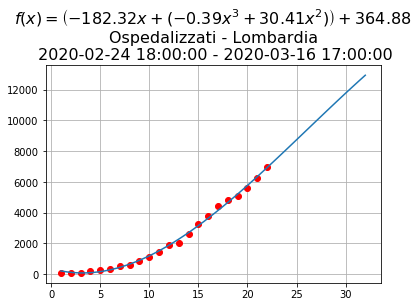

In [7]:
plotCurve('Ospedalizzati', 'Lombardia')

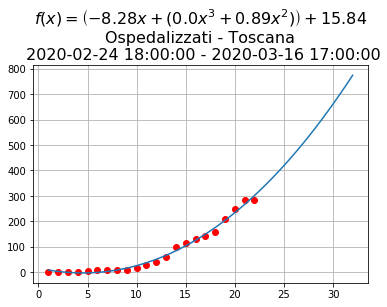

In [8]:
plotCurve('Ospedalizzati', 'Toscana')

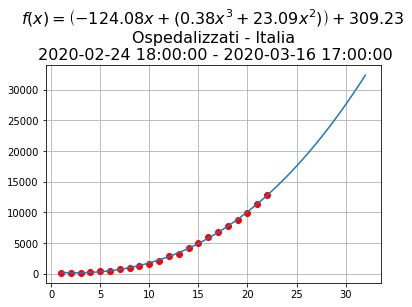

In [9]:
plotCurve('Ospedalizzati')

## Terapia intensiva

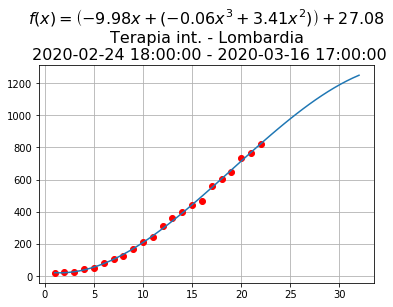

In [10]:
plotCurve('Terapia int.', 'Lombardia')

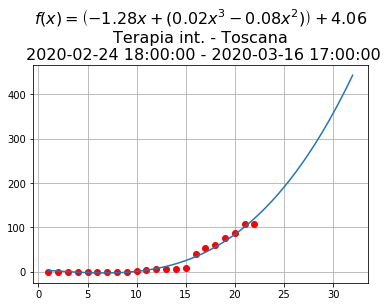

In [11]:
plotCurve('Terapia int.', 'Toscana')

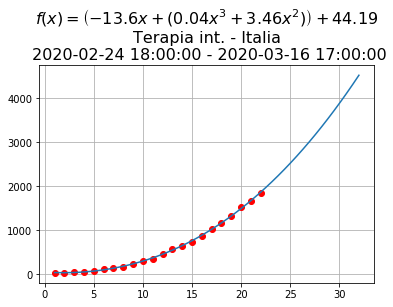

In [12]:
plotCurve('Terapia int.')

## Deceduti

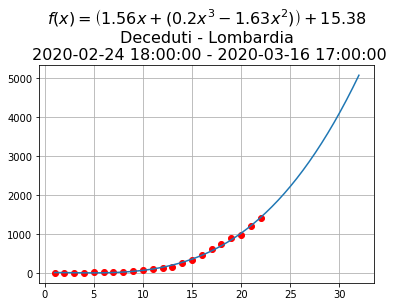

In [13]:
plotCurve('Deceduti', 'Lombardia')

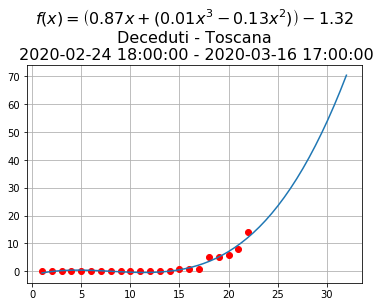

In [14]:
plotCurve('Deceduti', 'Toscana')

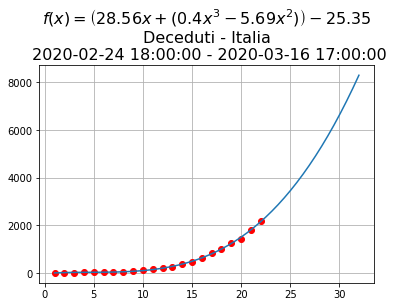

In [15]:
plotCurve('Deceduti')